#### Analysis of the GPU power consumption for training the model

The GPU power consumption is measured by nvidia-smi using the following command line command:

`nvidia-smi --query-gpu=index,timestamp,power.draw,clocks.sm,clocks.mem,clocks.gr --format=csv -l 1 -f ./GPU-stats.csv`

This saves the current power consumption, and other information of the GPU in the file `GPU-stats.csv` in the current directory.

The training was performed on a GTX 1070, CUDA 11.6 and CuDNN 8.5.

In [2]:
# Now we access the file and read the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

data = pd.read_csv('../Data/GPU-stats.csv')

In [24]:
data[' timestamp'] = pd.to_datetime(data[' timestamp'])
data[' timestamp'] = data[' timestamp'].dt.strftime('%H:%M:%S')
data[' power.draw [W]'] = data[' power.draw [W]'].str.replace('W', '').astype(float)
data.head()

,index,timestamp,power.draw [W],clocks.current.sm [MHz],clocks.current.memory [MHz],clocks.current.graphics [MHz]
0,0,14:31:54,8.55,83 MHz,405 MHz,83 MHz
1,0,14:31:55,7.29,88 MHz,405 MHz,88 MHz
2,0,14:31:56,8.11,114 MHz,405 MHz,114 MHz
3,0,14:31:57,8.65,115 MHz,405 MHz,115 MHz
4,0,14:31:58,9.38,170 MHz,405 MHz,170 MHz


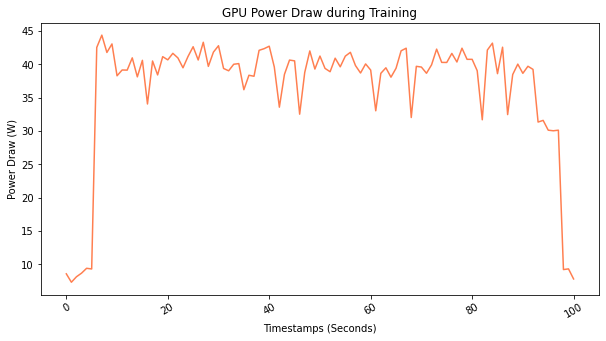

In [40]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(data[' power.draw [W]']),1), data[' power.draw [W]'], color='coral', label='Power Draw')
plt.xlabel('Timestamps (Seconds)')
plt.xticks(rotation=30)
plt.ylabel('Power Draw (W)')
plt.title('GPU Power Draw during Training')
plt.show()

In [51]:
total_energy_usage = data[' power.draw [W]'].sum()
kWh = total_energy_usage * ( len(data[' power.draw [W]']) / 3600 ) / 1000
print(f' Total energy usage = {total_energy_usage}W or {round(kWh, 2)}KWh')

 Total energy usage = 3688.06W or 0.1KWh
